# Introducción

El presente trabajo busca analizar desde la perspectiva de las redes neuronales el dataset relativo a la enfermedad de tiroides. El mismo fue descargado del repositorio 'Keel' (url: https://sci2s.ugr.es/keel/dataset.php?cod=67). El dataset  contiene 7200 instancias y 21 variables explicativas. Asimismo, no se relevan instancias con campos sin asignación.
El objetivo es aplicar las redes neuronales, de manera de predecir si los pacientes poseen una tiroides normal, si sufren de hipotiroidismo, o de hipertiroidismo.




# Carga y limpieza de los datos

In [1]:
#Monto la unidad del drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importo las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import DistanceMetric
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Importo keras y dentro de dicho paquete cargamos Sequential (inicializa los parámetros de la red neuronal), y Dense (declara y crea cada una de las capas intermedias de la red neuronal) 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ejercicio_collab/thyroid.csv')

Se realiza un 'print' de los primeros cinco resultados, de modo de hacer una primera aproximación a la estructura del dataset.

In [5]:
df.head(5).T

,0,1,2,3,4
Age,0.7300,0.24000,0.4700,0.6400,0.23000
Sex,0.0000,0.00000,0.0000,1.0000,0.00000
On_thyroxine,1.0000,0.00000,0.0000,0.0000,0.00000
Query_on_thyroxine,0.0000,0.00000,0.0000,0.0000,0.00000
On_antithyroid_medication,0.0000,0.00000,0.0000,0.0000,0.00000
Sick,0.0000,0.00000,0.0000,0.0000,0.00000
Pregnant,0.0000,0.00000,0.0000,0.0000,0.00000
Thyroid_surgery,0.0000,0.00000,0.0000,0.0000,0.00000
I131_treatment,1.0000,0.00000,0.0000,0.0000,0.00000
Query_hypothyroid,0.0000,0.00000,0.0000,0.0000,0.00000


Realizo un print de la cantidad de observaciones y columnas.

In [6]:
print("Observaciones: ", df.shape[0])
print("Características: ", df.shape[1])

Observaciones:  7200
Características:  22


Se analizan mínimos, máximos, y se corrobora la ausencia de NA´s para cada categoría:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7200.0,0.520518,0.189269,0.0100,0.37000,0.5500,0.6700,0.970
Sex,7200.0,0.304306,0.460145,0.0000,0.00000,0.0000,1.0000,1.000
On_thyroxine,7200.0,0.130556,0.336937,0.0000,0.00000,0.0000,0.0000,1.000
Query_on_thyroxine,7200.0,0.015417,0.123212,0.0000,0.00000,0.0000,0.0000,1.000
On_antithyroid_medication,7200.0,0.012778,0.112322,0.0000,0.00000,0.0000,0.0000,1.000
Sick,7200.0,0.038333,0.192013,0.0000,0.00000,0.0000,0.0000,1.000
Pregnant,7200.0,0.010833,0.103525,0.0000,0.00000,0.0000,0.0000,1.000
Thyroid_surgery,7200.0,0.014028,0.117613,0.0000,0.00000,0.0000,0.0000,1.000
I131_treatment,7200.0,0.016806,0.128551,0.0000,0.00000,0.0000,0.0000,1.000
Query_hypothyroid,7200.0,0.065556,0.247521,0.0000,0.00000,0.0000,0.0000,1.000


Los campos que contiene el dataset son los siguientes:

*   Age (edad): Variable continua. [0.01, 0.97]
*   Sex (sexo): Variable binaria [0 hombre, 1 mujer]
*   On_thyroxine (toma tiroxina): Variable binaria [0,1]
*   Query_on_thyroxine (consulta por tiroxina): Variable binaria [0,1]
*   On_antithyroid_medication (con medicación antitiroidea): Variable binaria [0,1]
*   Sick (enfermo): Variable binaria [0,1]
*   Pregnant (embarazada): Variable binaria [0,1]
*   Thyroid_surgery (operación de tiroides): Variable binaria [0,1]
*   I131_treatment (en tratamiento I131): Variable binaria [0,1]
*   Query_hypothyroid (consulta hipotiroidismo): Variable binaria [0,1]
*   Query_hyperthyroid (consulta hipertiroidismo): Variable binaria [0,1]
*   Lithium (Litio): Variable binaria [0,1]
*   Goitre: Variable binaria [0,1]
*   Tumor: Variable binaria [0,1]
*   Hypopituitary (hipopituitaria): Variable binaria [0,1]
*   Psych (psico): Variable binaria [0,1]
*   TSH (cantidad de TSH): Variable continua. [0.0, 0.53] 
*   T3 (cantidad de T3): Variable continua. [0.0005, 0.18]
*   TT4 (cantidad de TT4): Variable continua. [0.002, 0.6]
*   T4U (cantidad de T4U): Variable continua. [0.017, 0.233]
*   FTI (cantidad de FTI): Variable continua. [0.002, 0.642]
*   Class (clase): Variable target, categórica. [1 (Normal), 2 (Hipertiroidismo), 3 (Hipotiroidismo)

Se observa que las variables ya se encuentran estandarizadas y que no hay variables categóricas que deban ser convertidas a 'dummy'.

De igual modo, se observa que el formato de las variables es el correcto:

In [8]:
display(df.dtypes)

Age                           float64
 Sex                            int64
 On_thyroxine                   int64
 Query_on_thyroxine             int64
 On_antithyroid_medication      int64
 Sick                           int64
 Pregnant                       int64
 Thyroid_surgery                int64
 I131_treatment                 int64
 Query_hypothyroid              int64
 Query_hyperthyroid             int64
 Lithium                        int64
 Goitre                         int64
 Tumor                          int64
 Hypopituitary                  int64
 Psych                          int64
 TSH                          float64
 T3                           float64
 TT4                          float64
 T4U                          float64
 FTI                          float64
 Class                          int64
dtype: object

Se analiza la correlación entre las variables:

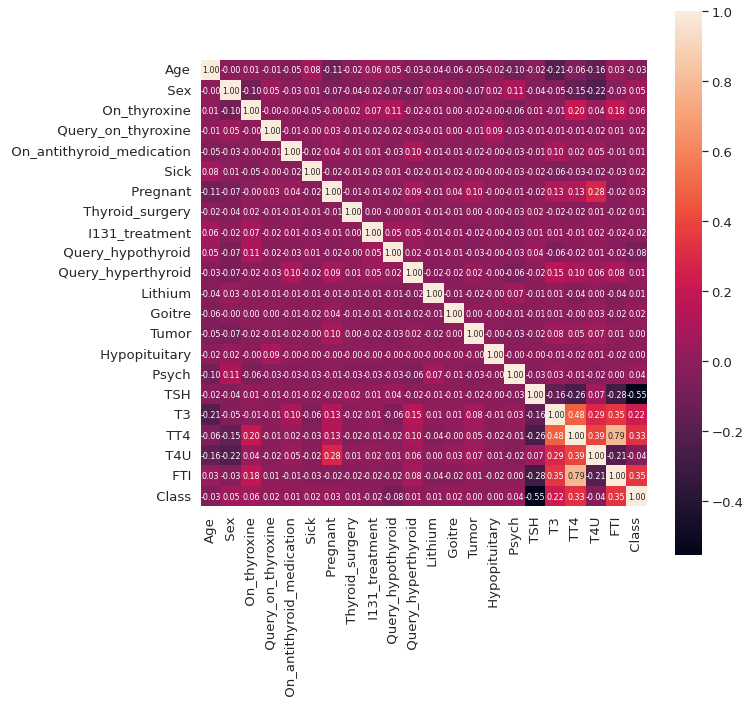

In [9]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df[df.columns].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 8}, yticklabels=df.columns, xticklabels=df.columns)
plt.show();

Se observa la existencia de multicolinealidad lineal perfecta (mayor a 0.7) entre las variables "FTI" y "TT4", por lo que se procede a remover esta última.

In [10]:
df2=df.drop(df.columns[[18]], axis=1)

Se pone de manifiesto que ha desaparecido la multicolinealidad lineal perfecta entre variables:

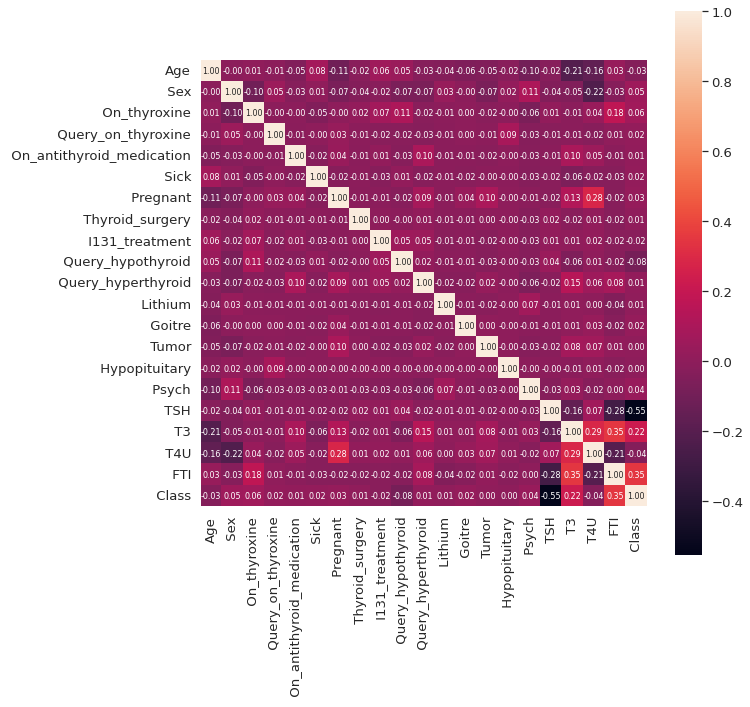

In [11]:
plt.figure(figsize=(10,10))
cm = np.corrcoef(df2[df2.columns].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 8}, yticklabels=df2.columns, xticklabels=df2.columns)
plt.show();

#### División en train y test de los datos





En primer lugar se deben crear dos subsets, uno de *training* y otro de *testing*, para entrenar y testear los modelos. 
Asimismo, se aplica una semilla, de manera de hacer los resultados replicables.

Los datos se dividen de la siguiente manera:

- 70% train
- 30% test

Se define la variable 'Class' como la variable target:

In [12]:
y = df2[df2.columns[20]]
X = df2.drop(df2.columns[[20]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

Tal como se puede observar debajo, el dataset se encuentra muy desbalanceado, con el 92,58% de los datos correndientes a hipotiroidismo, el 5,11% a hipertiroidismo, y el 2,31% a tiroides normal.
Por dicho motivo se procede a utilizar el método de 'SMOTE' para balancear el dataset mediante 'oversampling'. 

In [13]:
df2[' Class'].value_counts()

3    6666
2     368
1     166
Name:  Class, dtype: int64

In [14]:
sm = SMOTE(random_state=33)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Se han intentado diversos ajustes de SMOTE, siendo el que deja a las tres categorías con la misma cantidad de registros, la que obtiene mejores predicciones.

# Construcción de la RNA

Ajustamos los hiperparámetros mediante Gridsearch (esta linea del código se ha ejecutado en jupyter notebook, ya que al demorar horas su ejecución, no era posible realizar dicha operación en google colab).


Se procede a utilizar tres capas: una de entrada, una segunda capa, y la de salida.

In [15]:
def build_classifier(optimizer):
  # Inicializar la RNA
  classifier = Sequential()
  # En un primer paso se deben añadir la capa de entrada (declarando la cantidad de variables independientes del dataset en 'input_dim') y la primera capa oculta (en 'units', cuyo valor es la media entre la cantidad de capas de entrada y salida).
  # Asimismo, se definen los pesos al inicio del algoritmo mediante la función uniforme, de manera de garantizar que los pesos serán pequeños y cercanos a cero.
  # La función de activación de la capa oculta será 'rectivicador lineal unitario'. 
  classifier.add(Dense(units = 12, kernel_initializer = "uniform",  activation = "relu", input_dim = 20))
  
  # Se procede a añadir la segunda capa oculta
  classifier.add(Dense(units = 12, kernel_initializer = "uniform",  activation = "relu"))
  
  # Capa de salida
  # Para esta capa es necesario obtener la probabilid de que pertenezca a cada una de las tres clases, por lo que la función de activación a utilizar será softmax. De este modo, nos aseguramos de que la probabilidad de todas las posibles clasificaciones sumen uno.
  classifier.add(Dense(units = 3, kernel_initializer = "uniform",  activation = "softmax"))
  # Compilación de la red neuronal. 
  # La función de pérdida (minimiza el error entre la predicción y el dato real) será la 'categorial_crossentropy', teniendo en cuenta que nos encontramos frente a un problema de clasificación multiclase.
  classifier.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
  return classifier

In [16]:
classifier = KerasClassifier(build_fn = build_classifier)

Se especifican los parámetros a testear:

In [17]:
parameters = {
    'batch_size' : [10, 35 , 50],
    'epochs' : [100, 300, 500], 
    'optimizer' : ['adam', 'rmsprop']
}

Se valida utilizando CV y se elige el mejor modelo utilizando el accuracy:

In [ ]:
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10)
grid_search = grid_search.fit(X_train_res, y_train_res)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print(best_parameters)

{'batch_size': 10, 'epochs': 300, 'optimizer': 'adam'}


En base al gridsearch se observa que el mejor modelo posee los siguientes parámetros:

    'batch_size': 10

    'epochs': 300

    'optimizer': 'adam'}

# Evalación del modelo y predicciones finales

A continuación se ajusta el modelo y posteriormente se realizan las predicciones

In [ ]:
y_pred= grid_search.predict(X_test)

#### Matriz de confusión



Mediante el uso de la matriz de confusión, se evalua qué tan bueno ha resultado el modelo para la predicción:

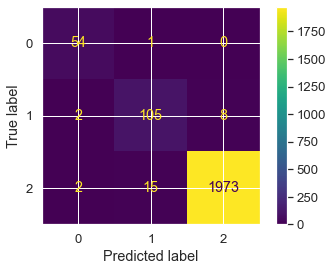

accuracy: 0.987037037037037
precision: [0.93103448 0.8677686  0.99596164]
recall: [0.98181818 0.91304348 0.99145729]
fscore: [0.95575221 0.88983051 0.99370436]
support: [  55  115 1990]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy_score(y_test, y_pred)) 

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Conclusiones: Se observa un excelente desempeño del modelo, con un accuracy de 0.987. Y si bien el dataset se encuentra desbalanceado (por eso se procedió a realizar un ajuste mediante la función SMOTE), se observan excelentes resultados para cada una de las posibles categorías de tiroides. En todos los casos, hay un recall (verdaderos positivos / (verdaderos positivos + falsos negativos)) superior a 0.91 y una precision (verdaderos positivos / (verdaderos positivos + falsos positivos)) de más de 0.86, lo que nos indica que la red predice muy bien todas las categorías.